# Loan Approval Prediction


Sklearn models to predict loan eligibility

# 1. Data description

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#loading data
train_df = pd.read_csv("C://Users//LeVT//Downloads//loan_approval.csv")
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# 2. Feature Engineering

In [4]:
#'Loan_Status' column represents if a customer is eligible for a loan 
#Drop the 'Loan ID' column
train_df = train_df.drop(columns='Loan_ID')

In [5]:
#Change datatype of 'Credit_History' column to string, of 'ApplicantIncome' to float 
train_df['Credit_History'] = train_df['Credit_History'].astype(str)
train_df['ApplicantIncome'] = train_df['ApplicantIncome'].astype(float)

In [6]:
#Change datatype of 'Dependents' column to float:
train_df['Dependents'] = train_df['Dependents'].map(lambda x: 3 if x == '3+' else float(x)) 

In [7]:
train_df.dtypes

Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
#Separate numerical and categorical columns
num_cols = [*train_df.select_dtypes('float64').columns] 
cat_cols = [*train_df.select_dtypes('object').columns] 

In [9]:
#Handling nulls
train_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
#Fillna for numerical columns:
for col in num_cols:
    train_df[col].fillna(train_df[col].mean(),inplace=True)

In [11]:
#Fillna for categorical columns:
train_df['Gender'].fillna("Male",inplace=True)
train_df['Married'].fillna("Yes",inplace=True)
train_df['Self_Employed'].fillna("No",inplace=True)
train_df['Credit_History'].fillna("1",inplace=True)

In [12]:
train_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
#Change Loan_Status values to binary values ('Y' to 1, 'N' to 0):
def change(string):
    if string == "Y":
        return  1
    else:
        return 0
train_df['Loan_Status'] = train_df['Loan_Status'].map(change)

In [14]:
train_df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.000000,0.687296
std,1.002718,6109.041673,2926.248369,84.037468,64.372489,0.463973
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,0.000000
50%,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


# 3. Data Visualization

C:\Users\LeVT\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LeVT\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LeVT\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

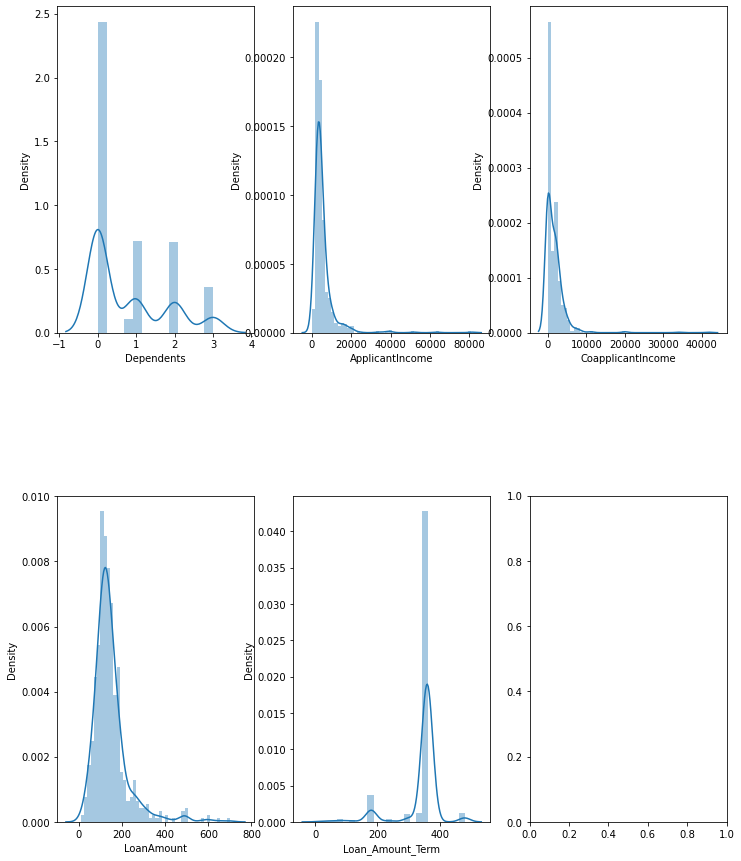

In [15]:
#Visualization to see distribution of values in numerical columns

fig,axes = plt.subplots(2,3,figsize=(12,15))
for index,col in enumerate(num_cols):
    x,y = index//3,index%3
    sns.distplot(train_df[col],ax=axes[x,y])

plt.subplots_adjust(hspace=0.5)

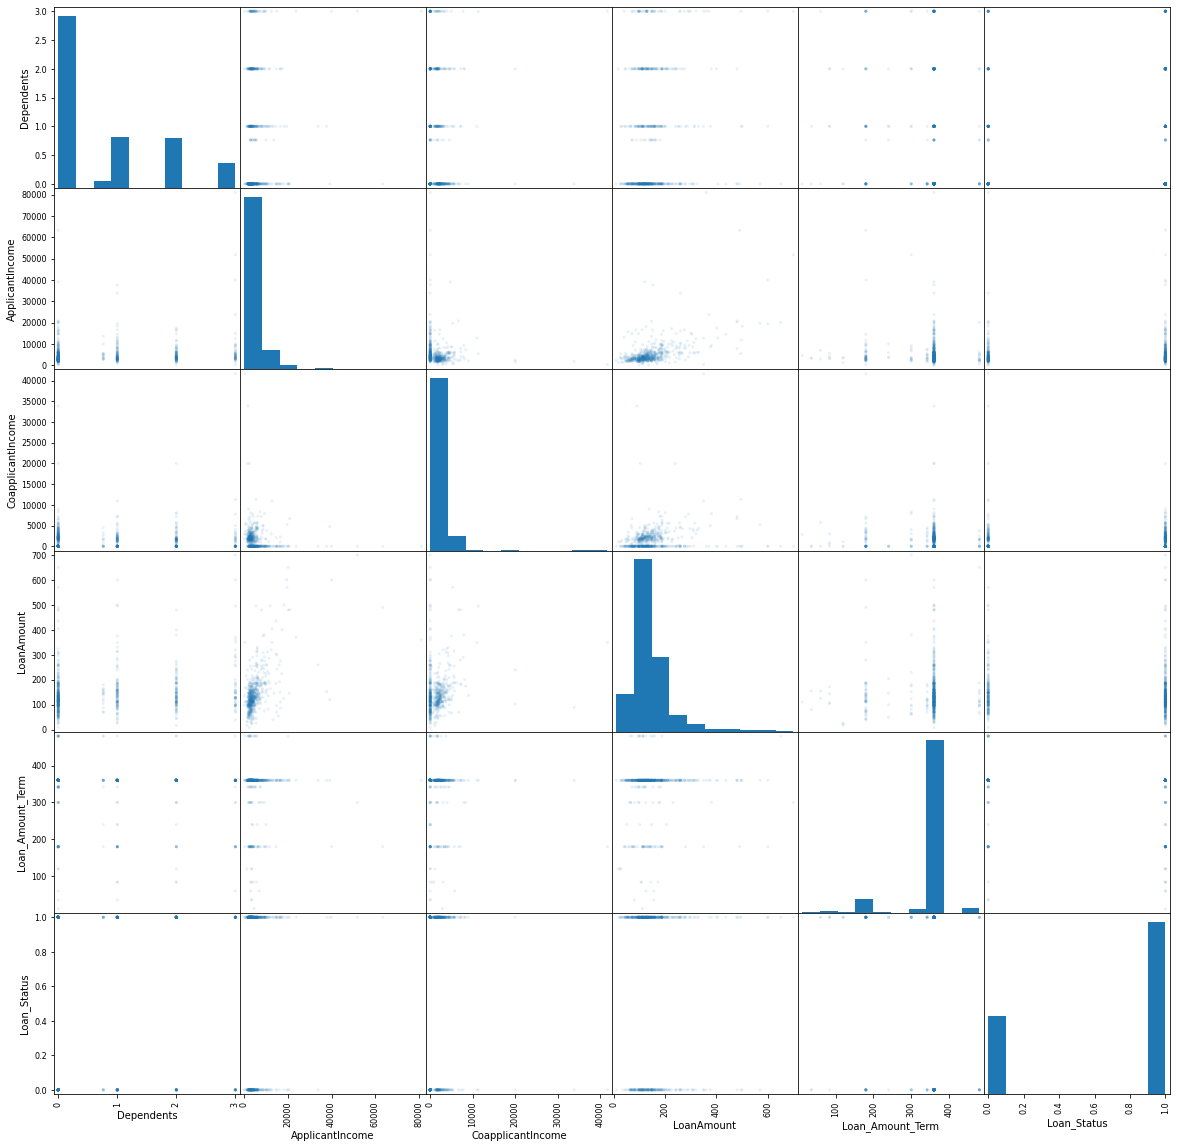

In [16]:
#Scatter matrix to see relations of variables.There is no significant numerical 
from pandas.plotting import scatter_matrix

scatter_matrix(train_df,figsize  = [20, 20],alpha = 0.1)
plt.show()

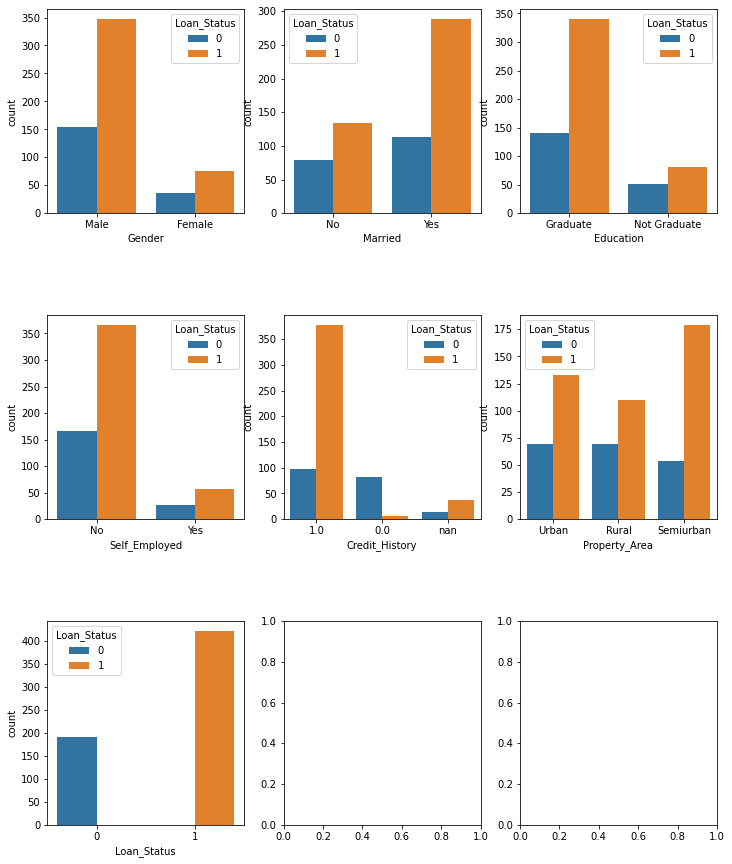

In [17]:
#Charts visualizing how variables in cat_cols affect Loan_Status 
fig,axes = plt.subplots(3,3,figsize=(12,15))
for index,col in enumerate(cat_cols):
    x,y = index//3,index%3
    sns.countplot(x=col,data=train_df,hue='Loan_Status',ax=axes[x,y])

plt.subplots_adjust(hspace=0.5)


# 4. Modelling

In [18]:
#Get dummies for training
train_df = pd.get_dummies(train_df)

In [19]:
train_df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Credit_History_nan,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,5849.0,0.0,146.412162,360.0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,1
1,1.0,4583.0,1508.0,128.000000,360.0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0
2,0.0,3000.0,0.0,66.000000,360.0,1,0,1,0,1,1,0,0,1,0,1,0,0,0,1
3,0.0,2583.0,2358.0,120.000000,360.0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,1
4,0.0,6000.0,0.0,141.000000,360.0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900.0,0.0,71.000000,360.0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0
610,3.0,4106.0,0.0,40.000000,180.0,1,0,1,0,1,1,0,1,0,0,1,0,1,0,0
611,1.0,8072.0,240.0,253.000000,360.0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1
612,2.0,7583.0,0.0,187.000000,360.0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1


In [20]:
#Assign X, y and Train - Test data
X = train_df.drop(columns=num_cols)
y = train_df['Loan_Status']
X.drop(columns=['Loan_Status'],inplace=True)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)

In [21]:
#Logistic Regression:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

clf = LogisticRegression(random_state=4).fit(X_train, y_train)

In [22]:
y_pred = clf.predict(X_test)
accuracy_score(y_pred,y_test)

0.8536585365853658

In [23]:
confusion_matrix(y_pred,y_test)

array([[21,  1],
       [17, 84]], dtype=int64)

In [24]:
#KNN:
from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor(n_neighbors = 10)
knn = knnr.fit(X_train, y_train)

In [25]:
y_predk = knn.predict(X_test)
y_predk

array([0.3, 0.9, 0.9, 0.9, 0.9, 0.8, 0.9, 0.9, 0.8, 0.7, 0.9, 0.9, 0.9,
       0.9, 0.3, 0.4, 0.7, 0.5, 0.6, 0.8, 0.3, 0.7, 0.8, 0.9, 0.9, 0.9,
       0.8, 0.9, 0.7, 0.9, 0.9, 0.9, 0.9, 0.8, 0.6, 0.7, 0.3, 0.9, 0.7,
       0.9, 0.9, 0.7, 0.9, 0.9, 0.7, 0.9, 0.9, 0.9, 0.9, 0.6, 0.3, 0.9,
       0.3, 0.6, 0.7, 0.7, 0.5, 0.9, 0.9, 0.6, 0.2, 0.7, 0.7, 0.8, 0.9,
       0.9, 0.9, 0.9, 0.7, 0.9, 0.9, 0.5, 0.9, 0.7, 0.9, 0.8, 0.9, 0.9,
       0.9, 0.2, 0.3, 0.7, 0.6, 0.9, 0.9, 0.9, 0.9, 0.7, 0.7, 0.9, 0.8,
       0.1, 0.4, 0.9, 0.9, 0.9, 0.7, 0.7, 0.9, 0.9, 0.9, 0.8, 0.8, 0.9,
       0.8, 0.9, 0.3, 0.8, 0.9, 0.9, 0.9, 0.9, 0.8, 0.8, 1. , 0.7, 0.8,
       0.8, 0.8, 0.2, 0.3, 0.7, 0.4])

In [26]:
accuracy = []
for thresh in np.arange(0.1,0.9,0.1):
    y_pred2 = [1 if i >= thresh else 0 for i in y_predk]
    acc = accuracy_score(y_pred2,y_test)
    accuracy.append([thresh,acc])
accuracy

[[0.1, 0.6910569105691057],
 [0.2, 0.6991869918699187],
 [0.30000000000000004, 0.7804878048780488],
 [0.4, 0.7804878048780488],
 [0.5, 0.8048780487804879],
 [0.6, 0.8292682926829268],
 [0.7000000000000001, 0.7560975609756098],
 [0.8, 0.7560975609756098]]

In [27]:
y_pred2 = [1 if i >= 0.6 else 0 for i in y_predk]
accuracy_score(y_pred2,y_test)

0.8292682926829268

In [28]:
confusion_matrix(y_pred2,y_test)

array([[18,  1],
       [20, 84]], dtype=int64)

In [29]:
#Decision Tree:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier(max_depth=1)
clf1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [30]:
y_pred3 = clf1.predict(X_test)

In [31]:
accuracy_score(y_pred3,y_test)

0.8536585365853658

In [32]:
#SVC:
from sklearn.svm import SVC
clf3 = SVC(gamma=.2, kernel='rbf', probability=True)
clf3.fit(X_train, y_train)

SVC(gamma=0.2, probability=True)

In [33]:
y_pred4 = clf3.predict(X_test)

In [34]:
accuracy_score(y_pred4,y_test)

0.8536585365853658

In [35]:
sum(y_pred2 == y_pred4)- len(y_pred)

-3

In [36]:
#Try mean of the 4 models:
tot_df = pd.DataFrame({'Logistic':y_pred})
tot_df['KNN'] = y_pred2
tot_df['Tree'] = y_pred3
tot_df['SVM'] = y_pred4
p = round(tot_df.mean(axis=1),0).values

In [37]:
accuracy_score(p,y_test)

0.8536585365853658